# Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   


2025-12-04 21:38:47.028656: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764884327.232525      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764884327.293488      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

# Training Image preprocessing

In [2]:
import kagglehub

path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/new-plant-diseases-dataset


In [3]:
train = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid = '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train,
    labels="inferred",
    label_mode="int",
    image_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    shuffle=True
)


Found 70295 files belonging to 38 classes.


I0000 00:00:1764884379.495255      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [5]:
    total_batches = training_set.cardinality().numpy()

    training_set = training_set.shuffle(
    buffer_size=100,
    reshuffle_each_iteration=True
    )

    portion = 0.5
    training_set = training_set.take(int(total_batches * portion))

# Validation Image Preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="int",
    image_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    shuffle=True
)

Found 17572 files belonging to 38 classes.


# Building Model(Import Libraries for  VGG16, VGG19, InceptionV3, Xception,ResNet50, DenseNet121
)

In [7]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import (
    VGG16, VGG19, InceptionV3, Xception,
    ResNet50, DenseNet121
)

NUM_CLASSES = 38
IMG_SIZE_224 = (224, 224)



# Building VGG16 Model

In [8]:
base_vgg16 = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=IMG_SIZE_224 + (3,)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# pre-trained conv base

In [9]:
vgg16 = tf.keras.models.Sequential()
vgg16.add(base_vgg16)
vgg16.add(layers.GlobalAveragePooling2D())
vgg16.add(layers.Dropout(0.3))
vgg16.add(layers.Dense(256, activation="relu"))
vgg16.add(layers.Dense(NUM_CLASSES, activation="softmax"))

In [10]:
base_vgg16.trainable = False

vgg16.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [11]:
vgg16.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,855,782 (56.67 MB)

 Trainable params: 141,094 (551.15 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
training_history = vgg16.fit(x=training_set,validation_data=validation_set,epochs=20)

Epoch 1/20


I0000 00:00:1764884392.936778      64 service.cc:148] XLA service 0x7d2e7800d900 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764884392.937728      64 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1764884393.372771      64 cuda_dnn.cc:529] Loaded cuDNN version 90300


   2/1098 ━━━━━━━━━━━━━━━━━━━━ 1:20 73ms/step - accuracy: 0.0781 - loss: 11.0248  

I0000 00:00:1764884402.102332      64 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1098/1098 ━━━━━━━━━━━━━━━━━━━━ 134s 106ms/step - accuracy: 0.5694 - loss: 1.8387 - val_accuracy: 0.8928 - val_loss: 0.3212
Epoch 2/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 118s 105ms/step - accuracy: 0.8463 - loss: 0.4804 - val_accuracy: 0.9136 - val_loss: 0.2542
Epoch 3/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 118s 106ms/step - accuracy: 0.8718 - loss: 0.3900 - val_accuracy: 0.9270 - val_loss: 0.2146
Epoch 4/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 118s 106ms/step - accuracy: 0.8811 - loss: 0.3504 - val_accuracy: 0.9347 - val_loss: 0.1953
Epoch 5/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 118s 106ms/step - accuracy: 0.8953 - loss: 0.3117 - val_accuracy: 0.9304 - val_loss: 0.2043
Epoch 6/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 118s 106ms/step - accuracy: 0.8989 - loss: 0.3013 - val_accuracy: 0.9280 - val_loss: 0.2103
Epoch 7/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 119s 107ms/step - accuracy: 0.9033 - loss: 0.2883 - val_accuracy: 0.9358 - val_loss: 0.1897
Epoch 8/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 118s 106ms/step - accuracy: 0.9

# Training set Accuracy(Evaluate the model)

In [13]:
train_loss, train_acc = vgg16.evaluate(training_set)
print('Training accuracy:', train_acc)

1098/1098 ━━━━━━━━━━━━━━━━━━━━ 80s 71ms/step - accuracy: 0.9659 - loss: 0.0966
Training accuracy: 0.9653062224388123


# Validation set Accuracy(Evaluate model)

In [14]:
val_loss, val_acc = vgg16.evaluate(validation_set)
print('Validation accuracy:', val_acc)


550/550 ━━━━━━━━━━━━━━━━━━━━ 39s 71ms/step - accuracy: 0.9361 - loss: 0.1948
Validation accuracy: 0.9351240396499634


#  Accuracy Visualization

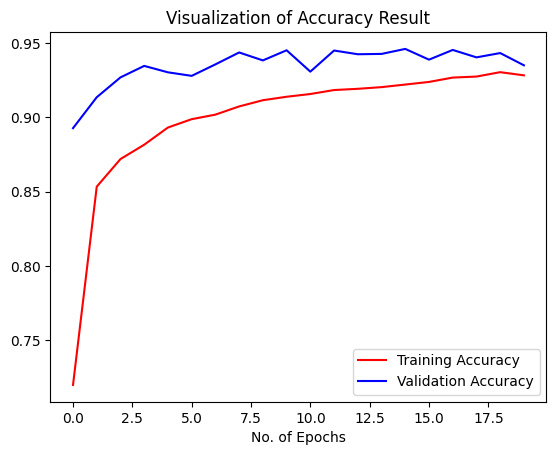

In [15]:
epochs = [i for i in range(20)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

#  Some other metrics for model evaluation

In [16]:
class_name = validation_set.class_names

In [17]:
test_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [18]:
y_pred = vgg16.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 102s 6ms/step


In [19]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
print("Shape of true_categories:", true_categories.shape)
print("First few values:", true_categories[:5])


Shape of true_categories: (17572,)
First few values: tf.Tensor([0 0 0 0 0], shape=(5,), dtype=int32)


In [20]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = true_categories.numpy()

In [21]:
predicted_categories = tf.argmax(y_pred, axis=1).numpy()

In [22]:
Y_true

array([ 0,  0,  0, ..., 37, 37, 37], dtype=int32)

In [23]:
predicted_categories

array([ 0,  0,  0, ..., 37, 37, 37])

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [25]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.94      0.96       504
                                 Apple___Black_rot       0.95      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.97      0.93      0.95       502
                               Blueberry___healthy       0.95      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.93      0.92       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.92      0.

#  Confusion Matrix Visualization

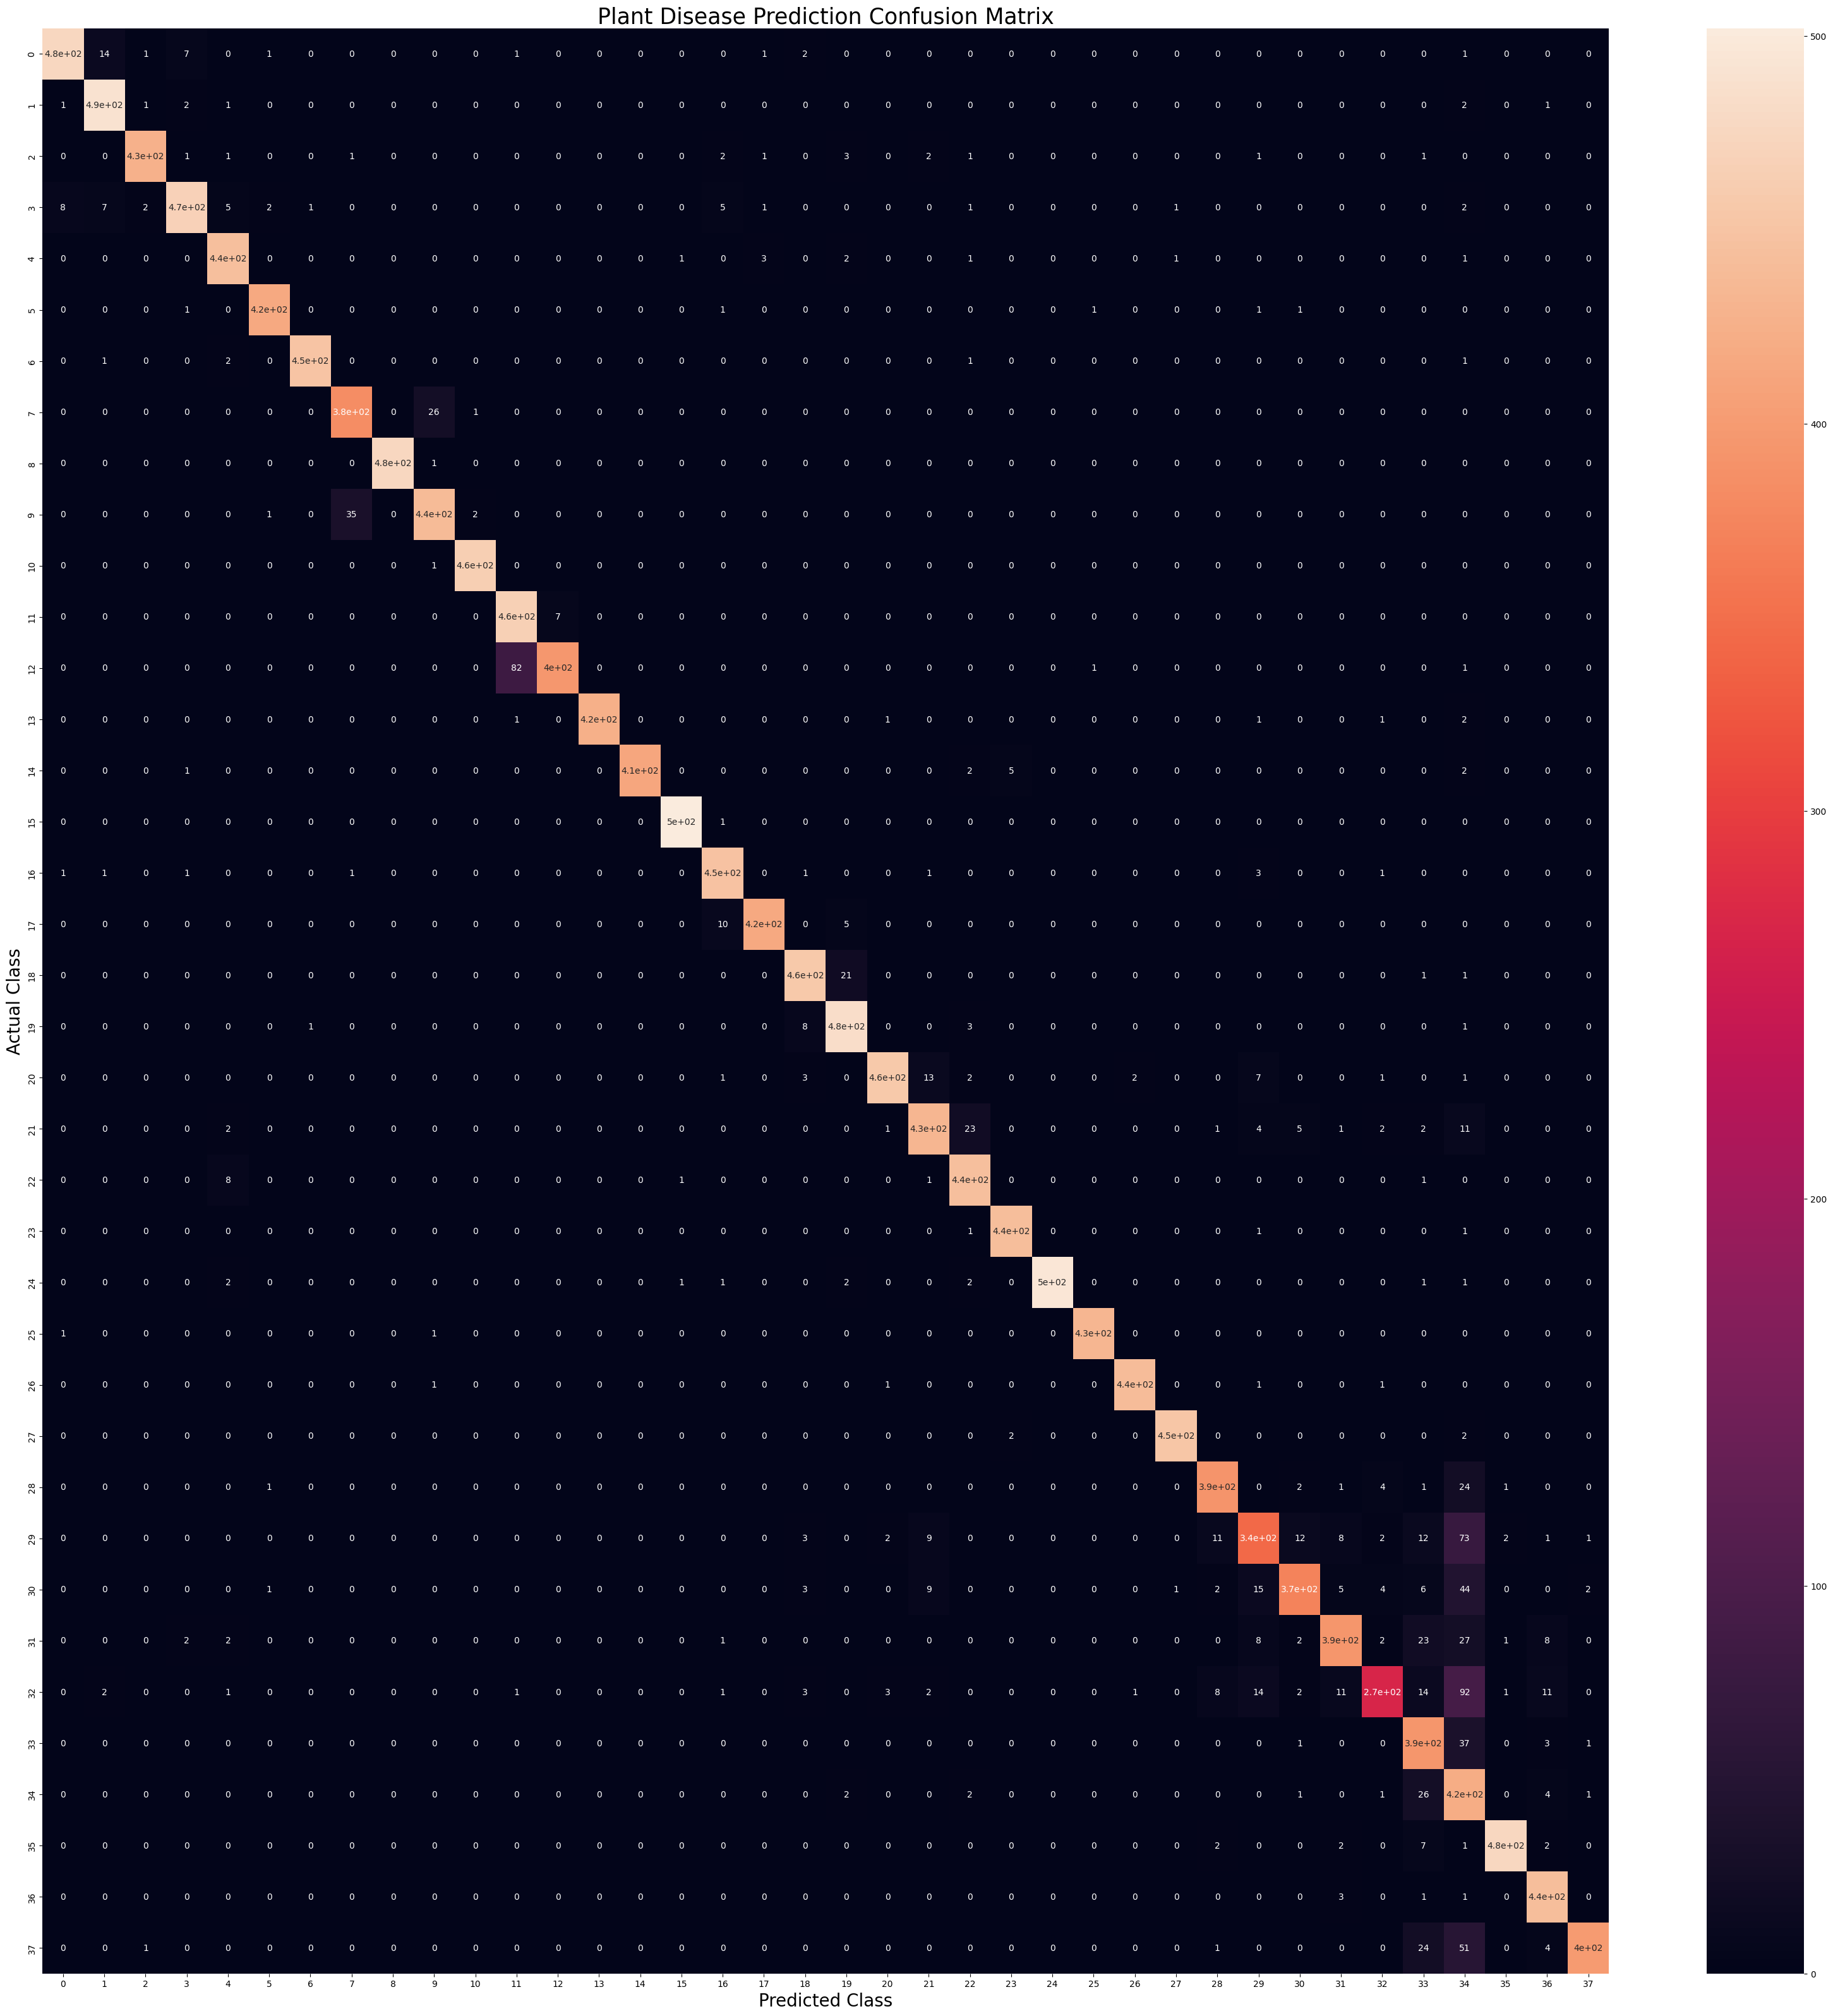

In [26]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

# Building VGG19 Model

In [ ]:
def build_model(base_model, img_size, num_classes):
    base_model.trainable = False
    inputs = layers.Input(shape=img_size + (3,))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = models.Model(inputs, outputs)

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )

    return model


In [28]:
base_vgg19 = VGG19(
    weights="imagenet",
    include_top=False,
    input_shape=IMG_SIZE_224 + (3,)
)
model_vgg19 = build_model(base_vgg19, IMG_SIZE_224, NUM_CLASSES)
history_vgg19 = model_vgg19.fit(
    training_set,
    validation_data=validation_set,
    epochs=20
)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 38)

# pre-trained conv base

In [ ]:
vgg19 = tf.keras.models.Sequential()
vgg19.add(base_vgg19)
vgg19.add(layers.GlobalAveragePooling2D())
vgg19.add(layers.Dropout(0.3))
vgg19.add(layers.Dense(256, activation="relu"))
vgg19.add(layers.Dense(NUM_CLASSES, activation="softmax"))

In [ ]:
base_vgg19.trainable = False

vgg19.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)


In [ ]:
vgg19.summary()

In [ ]:
training_history = vgg19.fit(x=training_set,validation_data=validation_set,epochs=20)

# Training set Accuracy(Evaluate the model)

In [ ]:
train_loss, train_acc = vgg19.evaluate(training_set)
print('Training accuracy:', train_acc)

# Validation set Accuracy(Evaluate model)

In [ ]:
val_loss, val_acc = vgg19.evaluate(validation_set)
print('Validation accuracy:', val_acc)


# Accuracy Visualization

In [ ]:
epochs = [i for i in range(20)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Some other metrics for model evaluation

In [ ]:
class_name = validation_set.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

In [ ]:
y_pred = vgg19.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
print("Shape of true_categories:", true_categories.shape)
print("First few values:", true_categories[:5])


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = true_categories.numpy()

In [ ]:
predicted_categories = tf.argmax(y_pred, axis=1).numpy()

In [ ]:
Y_true

In [ ]:
predicted_categories

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

#  Confusion Matrix Visualization

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

# Building Inception V3 Model

In [ ]:
IMG_SIZE_299 = (299, 299)

training_set_299 = tf.keras.utils.image_dataset_from_directory(
    train,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE_299,
    batch_size=32,
    color_mode="rgb",
    shuffle=True
)

validation_set_299 = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE_299,
    batch_size=32,
    color_mode="rgb",
    shuffle=True
)


In [ ]:
def build_model(base_model, img_size, num_classes):
    base_model.trainable = False
    inputs = layers.Input(shape=img_size + (3,))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [ ]:
base_inception = InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=IMG_SIZE_299 + (3,)
)

model_inception = build_model(base_inception, IMG_SIZE_299, NUM_CLASSES)

history_inception = model_inception.fit(
    training_set_299,          
    validation_data=validation_set_299,
    epochs=20
)

# Accuracy Visualization

In [ ]:
import matplotlib.pyplot as plt
epochs = [i for i in range(20)]
plt.plot(epochs,history_inception.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history_inception.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Some other metrics for model evaluation

In [ ]:
IMG_SIZE_299 = (299, 299)

validation_set_299 = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE_299,
    batch_size=32,
    color_mode="rgb",
    shuffle=True
)


In [ ]:
class_name = validation_set_299.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(299, 299),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

In [ ]:
y_pred = model_inception.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
print("Shape of true_categories:", true_categories.shape)
print("First few values:", true_categories[:5])


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = true_categories.numpy()

In [ ]:
Y_true

In [ ]:
predicted_categories

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

# Confusion Matrix Visualization

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

# Building Xception model


In [ ]:
base_xception = Xception(
    weights="imagenet",
    include_top=False,
    input_shape=IMG_SIZE_299 + (3,)
)

model_xception = build_model(base_xception, IMG_SIZE_299, NUM_CLASSES)
history_xception = model_xception.fit(
    training_set_299,
    validation_data=validation_set_299,
    epochs=20
    
)


# # Accuracy Visualization

In [ ]:
epochs = [i for i in range(20)]
plt.plot(epochs,history_xception.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history_xception.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Some other metrics for model evaluation

In [ ]:
IMG_SIZE_299 = (299, 299)

validation_set_299 = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="int",
    image_size=IMG_SIZE_299,
    batch_size=32,
    color_mode="rgb",
    shuffle=True
)


In [ ]:
class_name = validation_set_299.class_names

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(299, 299),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

In [ ]:
y_pred = model_xception .predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
print("Shape of true_categories:", true_categories.shape)
print("First few values:", true_categories[:5])


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = true_categories.numpy()

In [ ]:
Y_true

In [ ]:
predicted_categories

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

# Confusion Matrix Visualization

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

# Building ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
training_set = tf.keras.preprocessing.image_dataset_from_directory(
            train,
            seed=123,
            image_size=(224, 224),
            batch_size=32,
            label_mode='categorical',
            shuffle=True
        )

validation_set = tf.keras.preprocessing.image_dataset_from_directory(
            valid,
            seed=123,
            image_size=(224, 224), 
            batch_size=32,
            label_mode='categorical',
            shuffle=False
        )
class_name = validation_set.class_names
total_batches = training_set.cardinality().numpy()
training_set = training_set.shuffle(buffer_size=100, reshuffle_each_iteration=True)


portion = 0.5
training_set = training_set.take(int(total_batches * portion))

print(f"Using {int(total_batches * portion)} batches for training")

data_augmentation = tf.keras.Sequential([
            tf.keras.layers.RandomFlip("horizontal"),
            tf.keras.layers.RandomFlip("vertical"),
            tf.keras.layers.RandomRotation(0.2),
            tf.keras.layers.RandomZoom(0.2),
            tf.keras.layers.RandomContrast(0.2),
        ])

training_set = training_set.map(
            lambda x, y: (preprocess_input(data_augmentation(x, training=True)), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).prefetch(tf.data.AUTOTUNE)

validation_set = validation_set.map(
            lambda x, y: (preprocess_input(x), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).prefetch(tf.data.AUTOTUNE)

In [ ]:
def build_model(base_model, img_size, num_classes):
    base_model.trainable = False
    inputs = layers.Input(shape=img_size + (3,))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = models.Model(inputs, outputs)

    model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

    return model


In [ ]:
base_resnet = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=IMG_SIZE_224 + (3,)
)

model_resnet = build_model(base_resnet, IMG_SIZE_224, NUM_CLASSES)
history_resnet = model_resnet.fit(
    training_set,
    validation_data=validation_set,
    epochs=20
)


# Accuracy visualization



In [ ]:
epochs = [i for i in range(20)]
plt.plot(epochs,history_resnet.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history_resnet.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Some other metrics for model evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

In [ ]:
y_pred = model_resnet.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
print("Shape of true_categories:", true_categories.shape)
print("First few values:", true_categories[:5])


In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = true_categories.numpy()

In [ ]:
Y_true

In [ ]:
predicted_categories


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

#  Confusion Matrix Visualization


In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})
plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

# Building DenseNet121

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train,
    labels="inferred",
    label_mode="int",
    image_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    shuffle=True
)


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="int",
    image_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    shuffle=True
)

In [ ]:
def build_model(base_model, img_size, num_classes):
    base_model.trainable = False
    inputs = layers.Input(shape=img_size + (3,))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    model = models.Model(inputs, outputs)

    model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
    )


    return model


In [ ]:
base_densenet = DenseNet121(
    weights="imagenet",
    include_top=False,
    input_shape=IMG_SIZE_224 + (3,)
)

model_densenet = build_model(base_densenet, IMG_SIZE_224, NUM_CLASSES)
history_densenet = model_densenet.fit(
    training_set,
    validation_data=validation_set,
    epochs=20
)


# Accuracy Visualization


In [ ]:
epochs = [i for i in range(20)]
plt.plot(epochs,history_densenet.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,history_densenet.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


# Some other metrics for model evaluation


In [ ]:
class_name = validation_set.class_names


In [ ]:

test_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

In [ ]:
y_pred = model_densenet.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
print("Shape of true_categories:", true_categories.shape)
print("First few values:", true_categories[:5])

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = true_categories.numpy()

In [ ]:
Y_true

In [ ]:
predicted_categories

In [ ]:

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))


# Confusion Matrix Visualization


In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})
plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

# Comparison Table


In [ ]:
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd

def get_metrics(Y_true, y_pred, model_name):
    y_pred_classes = np.argmax(y_pred, axis=1)

    if Y_true.ndim == 2:
        Y_true_classes = np.argmax(Y_true, axis=1)
    else:
        Y_true_classes = Y_true

    report = classification_report(
        Y_true_classes,
        y_pred_classes,
        output_dict=True
    )
    return {
        "model_name": model_name,
        "accuracy": report["accuracy"],
        "precision_weighted": report["weighted avg"]["precision"],
        "recall_weighted": report["weighted avg"]["recall"],
        "f1_weighted": report["weighted avg"]["f1-score"],
        "precision_macro": report["macro avg"]["precision"],
        "recall_macro": report["macro avg"]["recall"],
        "f1_macro": report["macro avg"]["f1-score"],
    }

results = []
results.append(get_metrics(Y_true, y_pred,  "VGG16"))
results.append(get_metrics(Y_true, y_pred,  "VGG19"))
results.append(get_metrics(Y_true, y_pred,  "InceptionV3"))
results.append(get_metrics(Y_true, y_pred,   "Xception"))
results.append(get_metrics(Y_true, y_pred,    "ResNet50"))
results.append(get_metrics(Y_true, y_pred,  "DenseNet121"))

df = pd.DataFrame(results,
                  columns=[
                      "model_name",
                      "accuracy",
                      "precision_weighted",
                      "recall_weighted",
                      "f1_weighted",
                      "precision_macro",
                      "recall_macro",
                      "f1_macro"
                  ])

print(df)


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

probs = y_pred          
y_pred_classes = np.argmax(probs, axis=1)  

if Y_true.ndim == 2:
    Y_true_classes = np.argmax(Y_true, axis=1)
else:
    Y_true_classes = Y_true

report = classification_report(Y_true_classes, y_pred_classes, target_names=class_name)
print(report)
